# Baryons 2022 - notes
Notebook for creating plots and pictures to accompany the talk for the conference.

In [1]:
# Common imports
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.ticker import FuncFormatter, MaxNLocator

# For plotting styles...
sns.set_style("ticks")
sns.set_context("talk")
#sns.axes_style()


label_size = 20
plt.rcParams['axes.labelsize'] = label_size 
#plt.rcParams['ylabel.size'] = label_size 
#print(plt.rcParams.keys())

legend_size = 20

ticklabel_size = 20
plt.rcParams['xtick.labelsize'] = ticklabel_size 
plt.rcParams['ytick.labelsize'] = ticklabel_size 

# for PPNP consistency...
plt.rcParams['font.family'] = 'DejaVu Serif'


## Baryon Spectrum
Use the plot code from the PPNP article

In [3]:
# Read in PDG data...
nstar_1996_df = pd.read_csv('PDG1996_Nstar.csv',header=None,names=['resonance','jp','rating','mass','width'])
nstar_2022_df = pd.read_csv('PDG2022_Nstar.csv',header=None,names=['resonance','jp','rating','mass','width'])
delta_1996_df = pd.read_csv('PDG1996_Delta.csv',header=None,names=['resonance','jp','rating','mass','width'])
delta_2022_df = pd.read_csv('PDG2022_Delta.csv',header=None,names=['resonance','jp','rating','mass','width'])

# Collect DFs in array...
df_array = [nstar_1996_df, nstar_2022_df, delta_1996_df, delta_2022_df]

# Convert spin-parity to x-axis position...
def jp_to_x(str):
    j,p = str.split('/')
    if p[-1] == u'-' or p[-1] == chr(8722):
        pad = 18.0
    else:
        pad = 0.0
    return float(j)+pad

# Apply to all DFs...
for df in df_array:
    df['x_pos'] = df['jp'].apply(jp_to_x)

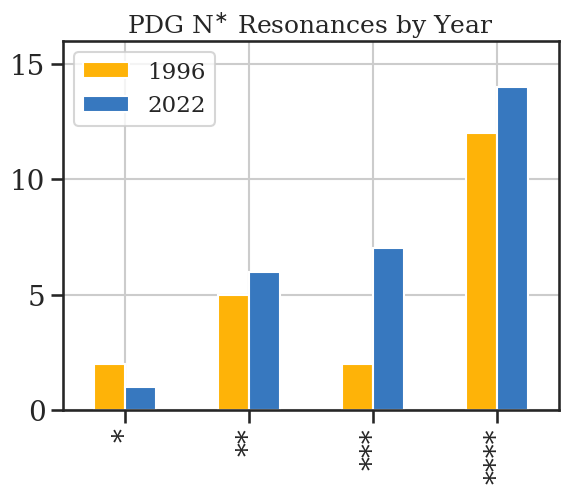

In [4]:
rating_arr = ['*','**','***','****']

nstar_count_1996 = []
nstar_count_2022 = []
for r in rating_arr:
    nstar_count_1996.append(sum(nstar_1996_df['rating']==r))
    nstar_count_2022.append(sum(nstar_2022_df['rating']==r))
    
nstar_rating_df = pd.DataFrame(zip(nstar_count_1996,nstar_count_2022),columns=['1996','2022'],index=rating_arr)
nstar_rating_df.plot.bar(color={"1996": "xkcd:amber", "2022": "xkcd:windows blue"})
plt.grid(True)
plt.ylim(0,16)
plt.title(r'PDG N$^{\ast}$ Resonances by Year')
plt.savefig('figures/nstar_resonances_year.svg', bbox_inches='tight')
plt.show()

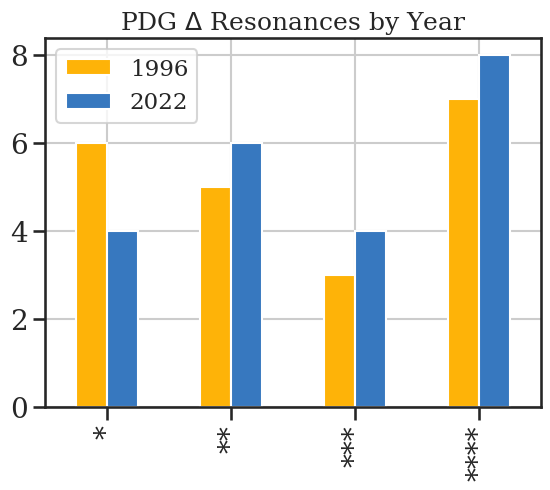

In [5]:
delta_count_1996 = []
delta_count_2022 = []
for r in rating_arr:
    delta_count_1996.append(sum(delta_1996_df['rating']==r))
    delta_count_2022.append(sum(delta_2022_df['rating']==r))
    
delta_rating_df = pd.DataFrame(zip(delta_count_1996,delta_count_2022),columns=['1996','2022'],index=rating_arr)
delta_rating_df.plot.bar(color={"1996": "xkcd:amber", "2022": "xkcd:windows blue"})
plt.grid(True)
plt.title(r'PDG $\Delta$ Resonances by Year')
plt.savefig('figures/delta_resonances_year.svg', bbox_inches='tight')
plt.show()

In [6]:
# Taken from somewhere else; can't recall!
# Create boxes in teh correct places for plotting on spectrum
def make_rerror_boxes(ax, df, xoff=0.0, facecolor='xkcd:windows blue', 
                     edgecolor='None', alpha=0.3):

    # Get calues from DataFrame...
    xdata  = np.array(df['x_pos'].values)
    ydata  = np.array(df['mass'].values) 
    xerror = 0.4*np.ones((2,len(xdata)))     
    widths = np.array(df['width'].values)
    yerror = 0.5*np.array([widths,widths])
    stars  = df['rating'].values

    
    # set array of alpha values...
    alphas = []
    for s in stars:
        if s=='*':
            alphas.append(0.1)
        elif s=='**':
            alphas.append(0.4)
        elif s=='***':
            alphas.append(0.7)
        else:
            alphas.append(1.0)
            
    # Create list for all the error patches
    errorboxes = []

    # Loop over data points; create box from errors at each point
    for x, y, xe, ye, a in zip(xdata, ydata, xerror.T, yerror.T, alphas):
        rect = Rectangle((xoff + x - xe[0], y - ye[0]), xe.sum(), ye.sum(), fc=facecolor, alpha=a)
        ax.add_patch(rect)

    # Plot errorbars
    artists = ax.errorbar(np.array(xdata)+xoff, ydata, xerr=xerror, fmt='None', ecolor='k')

    return artists


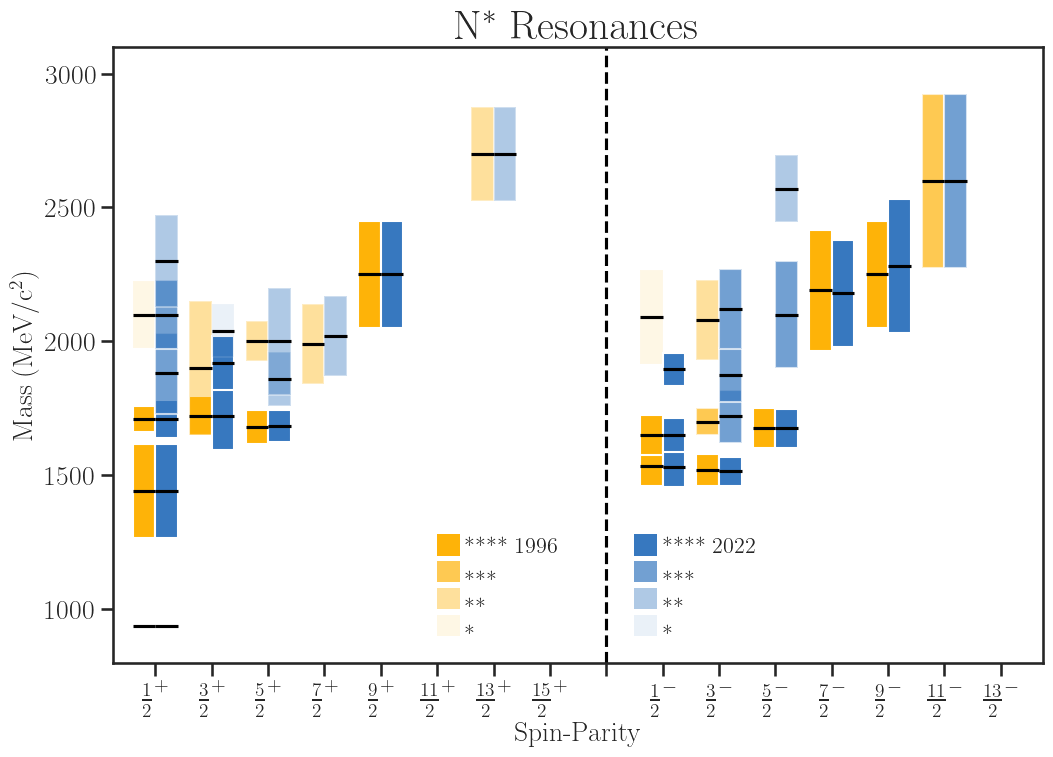

In [7]:
# Create figure and axes
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


def make_spectrum_plot(df1,df2,title,savefile=None):
    fig, ax = plt.subplots(1,figsize=(12,8))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    # Call function to create error boxes
    _ = make_rerror_boxes(ax, df1, -0.4, r'xkcd:amber')
    _ = make_rerror_boxes(ax, df2, 0.4)


    labels = [ r'$\frac{1}{2}^{+}$',
               r'$\frac{3}{2}^{+}$',
               r'$\frac{5}{2}^{+}$',
               r'$\frac{7}{2}^{+}$',
               r'$\frac{9}{2}^{+}$',
               r'$\frac{11}{2}^{+}$',
               r'$\frac{13}{2}^{+}$',
               r'$\frac{15}{2}^{+}$',
              '',
               r'$\frac{1}{2}^{-}$',
               r'$\frac{3}{2}^{-}$',
               r'$\frac{5}{2}^{-}$',
               r'$\frac{7}{2}^{-}$',
               r'$\frac{9}{2}^{-}$',
               r'$\frac{11}{2}^{-}$',
               r'$\frac{13}{2}^{-}$']

    locs = np.arange(1,33,2)


    ax.set_xlim((-0.5,32.5))
    ax.set_xlabel('Spin-Parity')
    ax.set_ylim((800,3100))
    ax.set_ylabel(r'Mass (MeV/c$^2$)')

    plt.title(title,fontsize=30)
    plt.xticks(locs, labels)
    plt.plot([17,17], [800,3100], 'k--')

    # Create a Rectangle patch
    boxes = []
    boxes.append(Rectangle((11,1200),0.8,80,linewidth=1,edgecolor='none',facecolor='xkcd:amber',alpha=1.0))
    boxes.append(Rectangle((18,1200),0.8,80,linewidth=1,edgecolor='none',facecolor='xkcd:windows blue',alpha=1.0))
    boxes.append(Rectangle((11,1100),0.8,80,linewidth=1,edgecolor='none',facecolor='xkcd:amber',alpha=0.7))
    boxes.append(Rectangle((18,1100),0.8,80,linewidth=1,edgecolor='none',facecolor='xkcd:windows blue',alpha=0.7))
    boxes.append(Rectangle((11,1000),0.8,80,linewidth=1,edgecolor='none',facecolor='xkcd:amber',alpha=0.4))
    boxes.append(Rectangle((18,1000),0.8,80,linewidth=1,edgecolor='none',facecolor='xkcd:windows blue',alpha=0.4))
    boxes.append(Rectangle((11,900),0.8,80,linewidth=1,edgecolor='none',facecolor='xkcd:amber',alpha=0.1))
    boxes.append(Rectangle((18,900),0.8,80,linewidth=1,edgecolor='none',facecolor='xkcd:windows blue',alpha=0.1))

    # Add the patch to the Axes
    for b in boxes:
        ax.add_patch(b)
    

    plt.text(12, 1210, '**** 1996', fontsize=16)
    plt.text(19, 1210, '**** 2022', fontsize=16)
    plt.text(12, 1110, '***', fontsize=16)
    plt.text(19, 1110, '***', fontsize=16)
    plt.text(12, 1010, '**', fontsize=16)
    plt.text(19, 1010, '**', fontsize=16)
    plt.text(12, 910, '*', fontsize=16)
    plt.text(19, 910, '*', fontsize=16)

    if savefile:
        plt.savefig(savefile, bbox_inches='tight')
    plt.show()
    return


make_spectrum_plot(df1=nstar_1996_df,df2=nstar_2022_df,title=r'N$^{\ast}$ Resonances',savefile='figures/nstar_spectrum_year.svg')

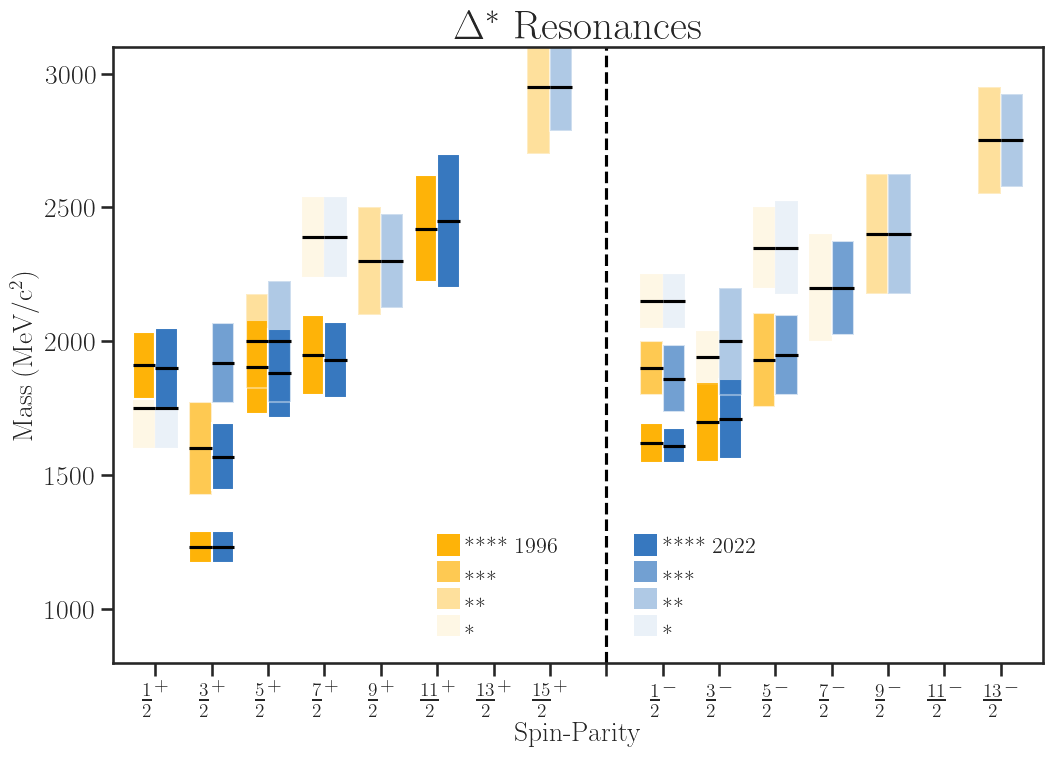

In [8]:
make_spectrum_plot(df1=delta_1996_df,df2=delta_2022_df,title=r'$\Delta^{\ast}$ Resonances',savefile='figures/delta_spectrum_year.svg')

## Kinematic Fit Demo
This is based on plots that were constructed for the 2017(!) NSTAR conference. The kinematics are adjusted to illustrate a clear pion case.

In [9]:
# Set mean values for the measured quantities, calculate measured mass...
# Measured momentum...
p_m = 200.0 
sig_p_m = 5.0

# Measured energy...
e_m = 235.0
sig_e_m = 10.0

# Mass calculated from measurements...
m_m = np.sqrt(e_m**2 - p_m**2)
sig_m_m = np.sqrt(((e_m**2 * sig_e_m**2) + (p_m**2 * sig_p_m**2))/(m_m**2))

print(f'Calculated mass: {m_m:.3f} MeV/c^2')
print(f'Uncertainty:      {sig_m_m:.3f} MeV/c^2')


Calculated mass: 123.390 MeV/c^2
Uncertainty:      20.698 MeV/c^2


In [10]:
from scipy.stats import norm

def prob_e(p,m,e_0,sig_e_0):
    e = np.sqrt(p**2 + m**2)
    return norm.pdf(e,e_0,sig_e_0)
    
def prob_p(p,m,e_0,sig_e_0):
    e = np.sqrt(p**2 + m**2)
    return norm.pdf(e,e_0,sig_e_0)
    
    
range_p = np.linspace(0, 300, 100)
range_m = np.linspace(0, 300, 100)
X,Y = np.meshgrid(range_p, range_m)
Z = prob_e(X, Y,e_m,sig_e_m).T

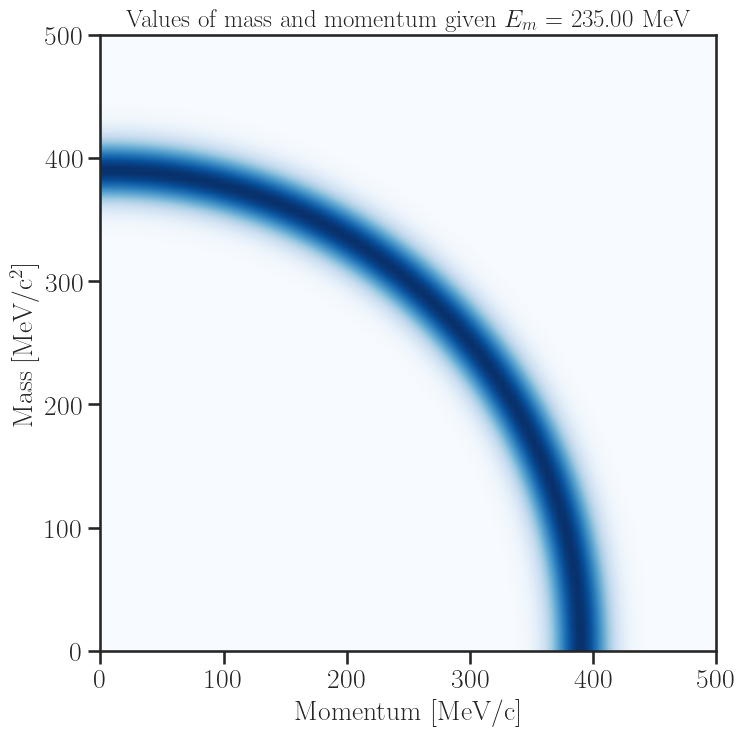

In [11]:
fig = plt.figure(figsize=(8,8))

im = plt.imshow(Z, cmap=plt.cm.Blues, vmin=0, vmax=abs(Z).max(), extent=[0, 500, 0, 500], origin='lower')
im.set_interpolation('bilinear')

plt.title(f'Values of mass and momentum given $E_m$ = {e_m:.2f} MeV')
plt.xlabel(r'Momentum [MeV/c]')
plt.ylabel(r'Mass [MeV/c$^2$]')

plt.savefig('figures/kinfit_e_p.svg', bbox_inches='tight')
plt.show()

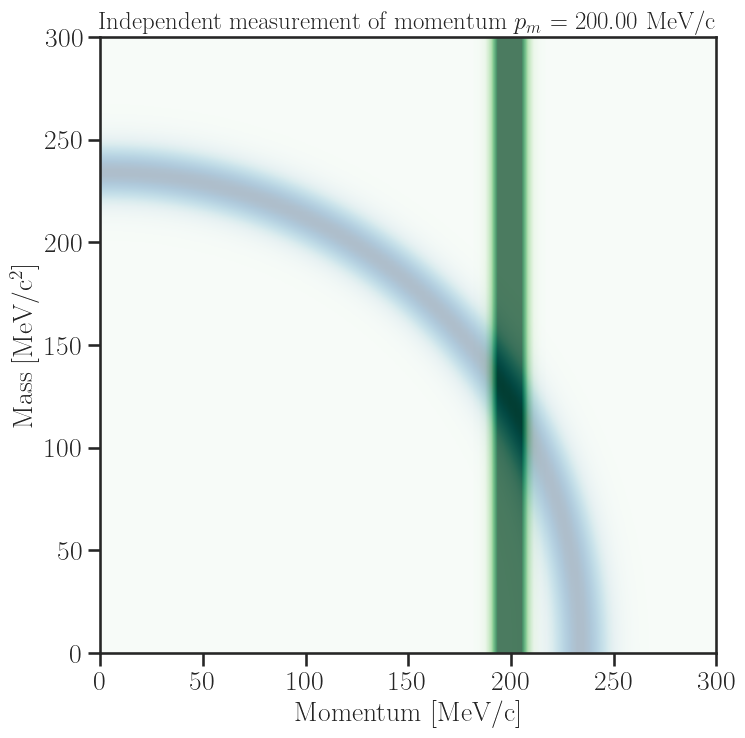

In [12]:
Z2 = norm.pdf(X,p_m,sig_p_m)
Z3 = norm.pdf(Y,m_m,sig_m_m)

fig = plt.figure(figsize=(8,8))

im = plt.imshow(Z, cmap=plt.cm.Blues, vmin=0, vmax=abs(Z).max(), 
            extent=[0, 300, 0, 300], origin='lower')
im.set_interpolation('bilinear')
im2 = plt.imshow(Z2, cmap=plt.cm.Greens, vmin=0, vmax=abs(Z).max(), alpha=0.7,
             extent=[0, 300, 0, 300], origin='lower')
im2.set_interpolation('bilinear')
# im3 = plt.imshow(Z3, cmap=plt.cm.Reds, vmin=0, vmax=abs(Z).max(), alpha=0.5,
#              extent=[0, 300, 0, 300], origin='lower')
# im3.set_interpolation('bilinear')

plt.title(f'Independent measurement of momentum $p_m$ = {p_m:.2f} MeV/c')
plt.xlabel(r'Momentum [MeV/c]')
plt.ylabel(r'Mass [MeV/c$^2$]')

plt.savefig('figures/kinfit_e_p_p.svg', bbox_inches='tight')
plt.show()


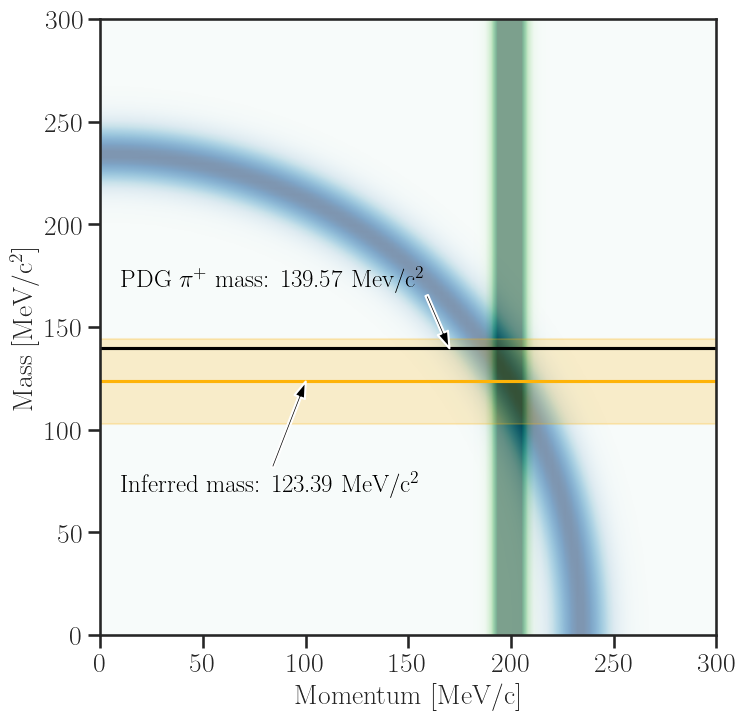

In [13]:
m_upper = (m_m + sig_m_m)*np.ones(range_p.shape)
m_lower = (m_m - sig_m_m)*np.ones(range_p.shape)

m_pion_pdg = 139.57

fig, ax = plt.subplots(1,figsize=(8,8))

im = plt.imshow(Z, cmap=plt.cm.Blues, vmin=0, vmax=abs(Z).max(), 
            extent=[0, 300, 0, 300], origin='lower')
im.set_interpolation('bilinear')
im2 = plt.imshow(Z2, cmap=plt.cm.Greens, vmin=0, vmax=abs(Z).max(), alpha=0.5,
             extent=[0, 300, 0, 300], origin='lower')
im2.set_interpolation('bilinear')
# im3 = plt.imshow(Z3, cmap=plt.cm.Reds, vmin=0, vmax=abs(Z).max(), alpha=0.7,
#              extent=[0, 300, 0, 300], origin='lower')
# im3.set_interpolation('bilinear')
plt.fill_between(range_p, m_upper, m_lower, alpha=0.2, color='xkcd:amber')
ax.axhline(m_m,color='xkcd:amber')
ax.axhline(m_pion_pdg,color='k')
ax.annotate(f'Inferred mass: {m_m:.2f} MeV/c$^2$', 
            xy=(100, m_m), 
            xytext=(10, 70), 
            #fontsize='large',
            color='k',
            arrowprops=dict(facecolor='k',width=2,headwidth=8))
ax.annotate(f'PDG $\pi^+$ mass: {m_pion_pdg: .2f} Mev/c$^2$', 
            xy=(170, m_pion_pdg), 
            xytext=(10, 170), 
            #fontsize='large',
            color='k',
            arrowprops=dict(facecolor='k',width=2,headwidth=8))

plt.xlabel(r'Momentum [MeV/c]')
plt.ylabel(r'Mass [MeV/c$^2$]')

plt.savefig('figures/kinfit_e_p_m.svg', bbox_inches='tight')
plt.show()

In [14]:
# Set up the probability distributions 
x = np.linspace(140,230, 91)
y_zero = np.zeros(x.shape)
p1 = norm.pdf(x,loc=p_m,scale=sig_p_m)
p2 = prob_p(x,m_pion_pdg,e_m,sig_e_m)
p2 /= p2.sum()
p3 = p1*p2
p3 /= p3.sum()

# Calculate adjusted values
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

p_adjusted, sig_p_adjusted = weighted_avg_and_std(x,p3)

e_adjusted = np.sqrt(m_pion_pdg**2 + p_adjusted**2)
sig_e_adjusted = (p_adjusted * sig_p_adjusted)/(e_adjusted)


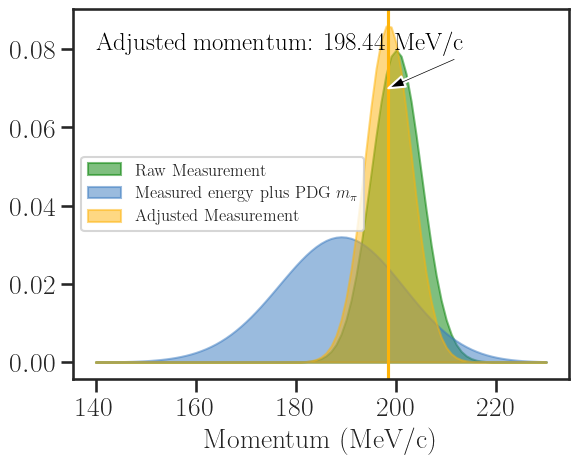

In [15]:
fig, ax = plt.subplots(1, 1)

#ax.plot(x, p1, color='g')
ax.fill_between(x,p1,y_zero,color='g',alpha=0.5,label='Raw Measurement')
ax.fill_between(x,p2,y_zero,color='xkcd:windows blue',alpha=0.5,label=r'Measured energy plus PDG $m_{\pi}$')
ax.fill_between(x,p3,y_zero,color='xkcd:amber',alpha=0.5,label='Adjusted Measurement')
ax.axvline(p_adjusted,color='xkcd:amber')
ax.annotate(f'Adjusted momentum: {p_adjusted: .2f} MeV/c', 
            xy=(p_adjusted, 0.07), 
            xytext=(140, 0.08), 
            #fontsize='large',
            color='k',
            arrowprops=dict(facecolor='k',width=2,headwidth=8))
ax.set_xlabel('Momentum (MeV/c)')
plt.legend(fontsize=12,loc='center left')
plt.savefig('figures/kinfit_momentum_1d.svg', bbox_inches='tight')
plt.show()

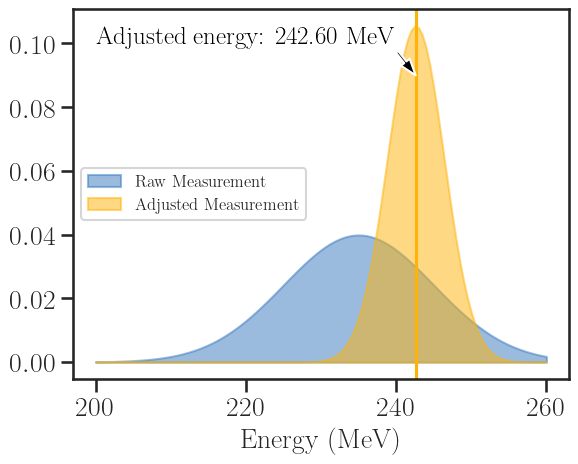

In [16]:
x = np.linspace(200,260, 121)
y_zero = np.zeros(x.shape)
p1 = norm.pdf(x,loc=e_m,scale=sig_e_m)
p2 = norm.pdf(x,loc=e_adjusted,scale=sig_e_adjusted)

fig, ax = plt.subplots(1, 1)

ax.fill_between(x,p1,y_zero,color='xkcd:windows blue',alpha=0.5, label='Raw Measurement')
ax.fill_between(x,p2,y_zero,color='xkcd:amber',alpha=0.5, label='Adjusted Measurement')
ax.axvline(e_adjusted,color='xkcd:amber')
ax.annotate(f'Adjusted energy: {e_adjusted: .2f} MeV', 
           xy=(e_adjusted, 0.09), 
           xytext=(200, 0.1), 
           #fontsize='large',
           color='k',
           arrowprops=dict(facecolor='k',width=2,headwidth=8))
ax.set_xlabel('Energy (MeV)')
plt.legend(fontsize=12,loc='center left')
plt.savefig('figures/kinfit_energy_1d.svg', bbox_inches='tight')

plt.show()

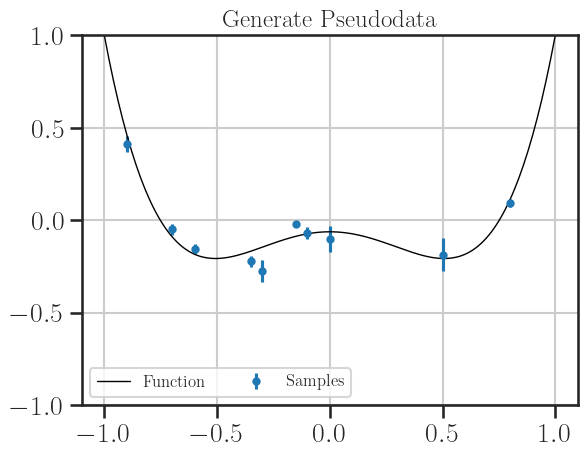

In [17]:
# Our funky function here
from scipy.special import legendre

def fn(xs):
    P2 = legendre(2)
    P4 = legendre(4)
    return 0.5*P2(xs) + 0.5*P4(xs)


x_fine = np.linspace(-1, 1, 200)
y_fine = fn(x_fine)


xs2 = np.array([-0.9, -0.7, -0.6, -0.35, -0.3, -0.15, -0.1, 0.0, 0.5, 0.8, 1.0])
ys2 = fn(xs2)

err_scale = np.random.uniform(low=0.03, high=0.1, size=ys2.shape)
sys_err = np.random.normal(loc=0, scale=err_scale, size=ys2.shape)

err = 0.5*np.random.gamma(2.0, err_scale, size=ys2.shape)
ys_err = ys2 + sys_err


my_dict = {'x':xs2, 'y_true':ys2, 'err_scale':err_scale, 'sys_err':sys_err, 'err':err, 'ys_err':ys_err}
my_df = pd.DataFrame(my_dict)
#print(my_df)

plt.title('Generate Pseudodata')
plt.errorbar(xs2, ys_err, yerr=err, fmt="o", label="Samples", markersize=5)
plt.plot(x_fine, y_fine, label="Function", color="k", lw=1)
plt.ylim(-1.0, 1.0), plt.legend(ncol=2, fontsize=12);
plt.grid(True)
plt.savefig('figures/gen_pseudodata.svg', bbox_inches='tight')


/opt/conda/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.35. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


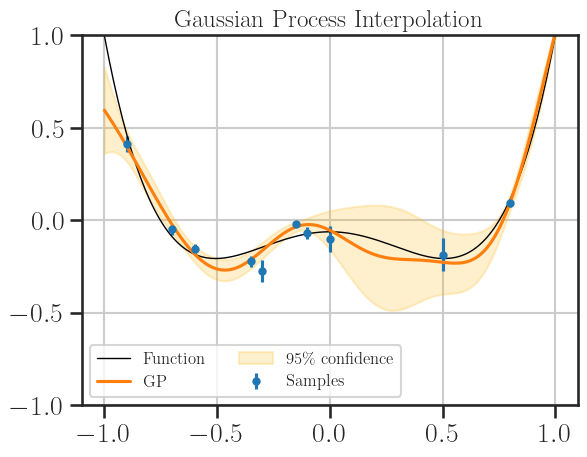

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
import sklearn.gaussian_process.kernels as k
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


#kernel = k.RBF(length_scale=0.1, length_scale_bounds=(0.01, 2.0))
gp = GaussianProcessRegressor(kernel=RBF(length_scale=0.5, length_scale_bounds=(0.35, 2.0)),alpha=err**2)
gp.fit(np.atleast_2d(xs2).T, ys_err)
y_pred, sigma = gp.predict(np.atleast_2d(x_fine).T, return_std=True)

# 1.96sigma = 95% confidence interval for a normal distribution
upper, lower = y_pred + 1.96 * sigma, y_pred - 1.96 * sigma

plt.title('Gaussian Process Interpolation')
plt.errorbar(xs2, ys_err, yerr=err, fmt="o", label="Samples", markersize=5)
plt.plot(x_fine, y_fine, label="Function", color="k", lw=1)
plt.plot(x_fine, y_pred, label="GP", ls="-")
#plt.fill_between(x_fine, upper, lower, alpha=0.2, label="95% confidence", color="#2698eb")
plt.fill_between(x_fine, upper, lower, alpha=0.2, label="95\% confidence", color="xkcd:amber")
plt.ylim(-1.0, 1.0), plt.legend(ncol=2, fontsize=12);
plt.grid(True)
plt.savefig('figures/gp_interpolation.svg', bbox_inches='tight')

#print(f"RBF, length_scale={gp.kernel_.length_scale:0.3f}")

## Post Baryons Conference Additions

In [19]:
# Read in table of thresholds...
thresholds_df = pd.read_csv('Reaction_Thresholds.csv',header=0,names=['Reaction','E_gamma','W'])

#Sort by threshold energy...    
thresholds_df = thresholds_df.sort_values(by=['W'])

# Add column to indicate target
def reaction_target(str):
    if str.find('gamma p') !=-1: 
        target = 'proton'
    else:
        target = 'neutron'
    return target

thresholds_df['Target'] = thresholds_df['Reaction'].apply(reaction_target)

#print(thresholds_df[thresholds_df['Target']=='proton'])

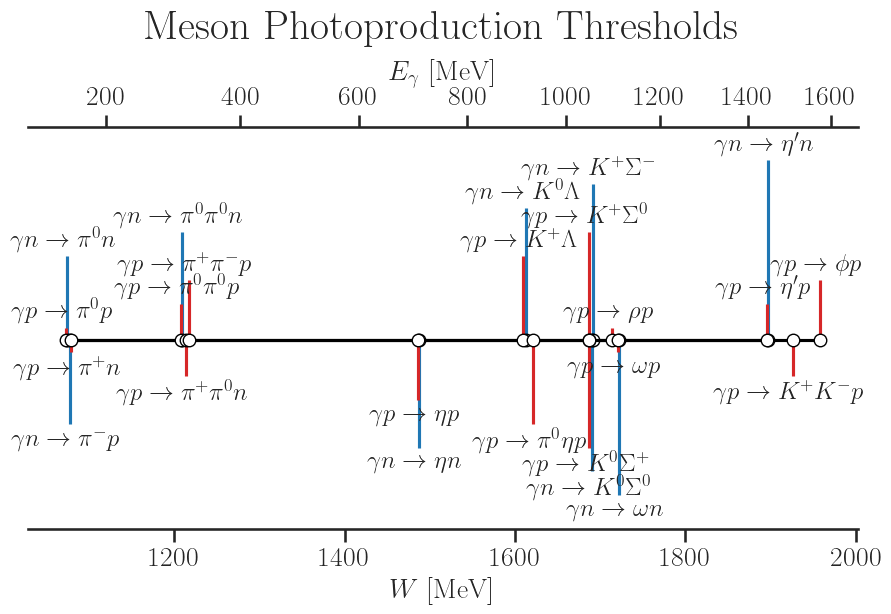

In [21]:
# Proton channels
names_p =  thresholds_df[thresholds_df['Target']=='proton']['Reaction'].values
w_thr_p = thresholds_df[thresholds_df['Target']=='proton']['W'].values
# Choose some nice levels
levels_p = np.tile([1, -1, 3, -3, 5, -5, 7, -7, 9, -9],
                 int(np.ceil(len(w_thr_p)/10)))[:len(w_thr_p)]

# Neutron channels
names_n =  thresholds_df[thresholds_df['Target']=='neutron']['Reaction'].values
w_thr_n = thresholds_df[thresholds_df['Target']=='neutron']['W'].values
# Choose some nice levels
levels_n = np.tile([7, -7, 9, -9, 11, -11, 13, -13, 15, -15],
                 int(np.ceil(len(w_thr_n)/10)))[:len(w_thr_n)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 6), constrained_layout=True)
plt.title("Meson Photoproduction Thresholds",fontsize=30, y=1.2)

ax.vlines(w_thr_n, 0, levels_n, color="tab:blue")  # The vertical stems.
ax.plot(w_thr_n, np.zeros_like(w_thr_n), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(w_thr_p, levels_p, names_p):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l > 0 else "top")

ax.vlines(w_thr_p, 0, levels_p, color="tab:red")  # The vertical stems.
ax.plot(w_thr_p, np.zeros_like(w_thr_p), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(w_thr_n, levels_n, names_n):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l > 0 else "top")


# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.set_xlabel('$W$ [MeV]')

mp = 938.272

def eg2w(x):
    return np.sqrt(mp*(mp + 2.0*x))


def w2eg(x):
    return (x*x - mp*mp)/(2.0*mp)

secax = ax.secondary_xaxis('top', functions=(w2eg, eg2w))
secax.set_xlabel('$E_{\gamma}$ [MeV]')

ax.margins(y=0.1)
plt.savefig('figures/thresholds.svg', bbox_inches='tight')
plt.show()


In [22]:
!pip install watermark

In [24]:
%load_ext watermark

In [25]:
%watermark

Last updated: 2022-12-29T17:23:26.982380+00:00

Python implementation: CPython
Python version       : 3.10.8
IPython version      : 8.7.0

Compiler    : GCC 10.4.0
OS          : Linux
Release     : 4.19.128-microsoft-standard
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [26]:
%watermark --iversions 

pandas    : 1.5.2
matplotlib: 3.6.2
seaborn   : 0.12.1
numpy     : 1.23.5
sklearn   : 1.2.0



In [27]:
!pip install pipreqsnb

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pipreqsnb: filename=pipreqsnb-0.2.4-py3-none-any.whl size=4126 sha256=d4433b03866e75f0efeba486f14b07087b1b665736b0eccc04732e27ca38add9
  Stored in directory: /home/jovyan/.cache/pip/wheels/59/01/83/364203b7d6d3b85a28f272651a0cc23aa5cec9d26817975152
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=d7573eb2b8a05707c45c54441d81b00432fadbca0a76bf335b60f1b7d4a66b29
  Stored in directory: /home/jovyan/.cache/pip/wheels/7c/d7/8d/2156234738063e3d4a39ba77dc677046100e62766b53807189
Successfully built pipreqsnb docopt


In [28]:
!pipreqsnb . 

pipreqs  .
INFO: Successfully saved requirements file in ./requirements.txt
